In [6]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

# Load environment variables from .env file
load_dotenv()

# Create the ChatOpenAI model (will automatically use OPENAI_API_KEY from environment)
model = ChatOpenAI()

# --- Step 1: Summarize Text ---
original_text = "Large language models are powerful AI systems trained on vast amounts of text data. They can generate human-like text, translate languages, write different kinds of creative content, and answer your questions in an informative way."
prompt1 = f"Summarize the following text in one sentence: {original_text}"

# Generate content using LangChain's ChatOpenAI
response1 = model.invoke(prompt1)
summary = response1.content.strip()
print(f"Summary: {summary}")

# --- Step 2: Translate the Summary ---
prompt2 = f"Translate the following summary into French, only return the translation, no other text: {summary}"

# Generate content using LangChain's ChatOpenAI
response2 = model.invoke(prompt2)
translation = response2.content.strip()
print(f"Translation: {translation}")

Summary: Large language models are advanced AI systems trained on extensive text data that can generate human-like text, translate languages, write creative content, and provide informative answers to questions.
Translation: Les grands modèles linguistiques sont des systèmes avancés d'intelligence artificielle entraînés sur des données textuelles étendues qui peuvent générer un texte semblable à celui d'un humain, traduire des langues, rédiger du contenu créatif et fournir des réponses informatives aux questions.


In [7]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [9]:
class LLMState(TypedDict):
    original_text : str
    summary : str
    translation : str

In [17]:
def summarize(state: LLMState) -> LLMState:
    original_text = state["original_text"]

    prompt1 = f"Summarize the following text in one sentence: {original_text}"

    summary = model.invoke(prompt1)

    state["summary"] = summary

    return state

In [18]:
def translate(state: LLMState) -> LLMState:
    summary = state["summary"]

    prompt2 = f"Translate the following text into French, only return the translation, no other text: {summary}"
    translation = model.invoke(prompt2)
    state["translation"] = translation
    return state

In [19]:
#create graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node("summarize", summarize)
graph.add_node("translate", translate)

# add edges
graph.add_edge(START, "summarize")
graph.add_edge("summarize", "translate")
graph.add_edge("translate", END)

# compile graph
workflow = graph.compile()

In [21]:
original_text = "Large language models are powerful AI systems trained on vast amounts of text data. They can generate human-like text, translate languages, write different kinds of creative content, and answer your questions in an informative way."

In [26]:
#execute the graph
initial_state = {"original_text": original_text}

final_state = workflow.invoke(initial_state)

print (final_state["summary"].content)
print (final_state["translation"].content)

Large language models are AI systems trained on extensive text data that can generate human-like text, translate languages, write creative content, and provide informative answers to questions.
Les grands modèles de langage sont des systèmes d'IA formés sur de vastes données textuelles qui peuvent générer un texte semblable à celui des humains, traduire des langues, rédiger du contenu créatif et fournir des réponses informatives aux questions.


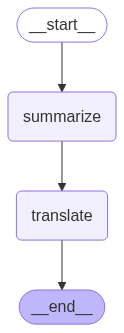

In [31]:
from IPython.display import display, Image
Image(workflow.get_graph().draw_mermaid_png())